In [1]:
## Import all the libraries that I need to plot, scale my data and perform a DBSCAN, Hierarchical and KMeans clustering
## I loaded the csv file onto my Jupyter notebook
#I used df.info and df.head to see more info of my dataset as well as to see the first instances of my dataset
# I scaled my data before I performed any clustering algorithm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
df = pd.read_csv (r'C:\Users\rames\OneDrive\Escritorio\MMA\MMA 869 Machine Learning & Artificial Intelligence\Individual Assignment\jewelry_customers.csv')
df.info()
df.head()
X=df.to_numpy()
X.shape
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
scaler= StandardScaler()
X=scaler.fit_transform(X)
X


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       ...,
       [ 1.28462560e+00, -1.11844679e+00, -5.78054216e-01,
         8.55312852e-01],
       [ 1.32609162e+00, -1.52492929e+00, -5.79865675e-01,
         1.32245159e+00],
       [ 1.24315958e+00, -1.25833506e+00, -8.31889622e-01,
         5.10463046e-01]])

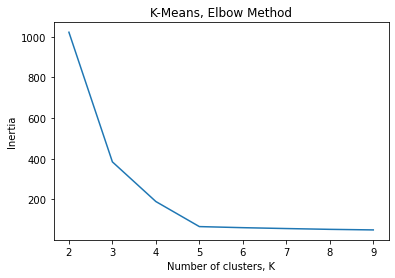

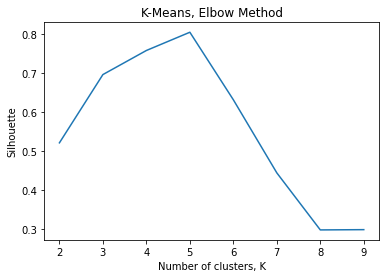

In [2]:
################ KMeans 
## I performed a KMeans clustering and decided to set a seed so that other individuals can replicate my numbers
## I decided to make two plots to help me determine what the optimium number of clusters 
# I am looking to minumuze inertia while maximizing the silhouette score
## The two plots show that 5 clusters yield the best results
k_means = KMeans(n_clusters=5, random_state=29)
k_means.fit(X)
inertias = {}
silhouettes = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=29).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

In [3]:
############################## DBSCAN

#### I then implemented 3 DBSCAN clustering algortihms with different hyper parameters to determine the number of clusters

db=DBSCAN(eps=0.3, min_samples=5)
db.fit(X)
db.labels_
silhouette_score(X, db.labels_)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1, -1,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0, -1,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1, -1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4, -1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1, -1,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

0.7647456695218847

In [4]:
db=DBSCAN(eps=0.8, min_samples=20)
db.fit(X)
db.labels_
silhouette_score(X, db.labels_,random_state=29)
  

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

array([0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 3, 4, 4, 4, 0, 3, 0, 1, 1, 3, 4, 3,
       0, 1, 3, 2, 2, 0, 1, 0, 0, 0, 1, 0, 4, 0, 1, 0, 4, 4, 0, 1, 2, 0,
       0, 2, 3, 2, 4, 0, 1, 4, 2, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 4, 1, 1, 4, 0, 4, 0, 0, 2, 0, 3, 0, 1, 1, 4, 4, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 4, 0, 0, 4, 4, 2, 4, 2, 4, 1, 1, 4, 4, 0,
       1, 4, 0, 4, 4, 4, 0, 4, 2, 1, 4, 1, 1, 1, 4, 3, 0, 1, 0, 0, 4, 0,
       4, 0, 2, 1, 3, 2, 0, 4, 1, 0, 0, 2, 0, 2, 0, 3, 0, 1, 0, 4, 1, 0,
       1, 3, 4, 0, 1, 0, 4, 1, 0, 4, 1, 4, 1, 0, 4, 0, 1, 0, 4, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 4, 2, 2, 1, 4, 0, 0, 0, 4, 1, 0, 0, 0, 1, 2, 4,
       1, 1, 1, 4, 0, 4, 0, 4, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 4, 2, 4, 1,
       0, 0, 4, 1, 4, 2, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 4, 4, 2, 0,
       0, 0, 3, 0, 4, 1, 2, 2, 2, 1, 0, 4, 1, 1, 4, 4, 0, 0, 3, 0, 0, 1,
       0, 1, 4, 2, 0, 4, 1, 0, 1, 1, 4, 0, 1, 1, 0, 0, 1, 4, 4, 3, 4, 1,
       1, 4, 3, 1, 1, 2, 0, 4, 4, 0, 4, 1, 1, 4, 0,

0.8048976287605382

In [5]:
db=DBSCAN(eps=0.3, min_samples=15)
db.fit(X)
db.labels_
silhouette_score(X, db.labels_,random_state=29)
### The -1 means that these custoemres are considered to be noise. That is why they are negative

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

array([ 0,  0,  0,  0,  1,  3,  0,  1,  1,  1, -1,  2,  2,  2,  0, -1,  0,
        1,  1, -1,  2, -1,  0,  1, -1, -1, -1,  0,  1,  0,  0,  0,  1,  0,
        2,  0,  1,  0,  2,  2,  0,  1, -1,  0,  0, -1, -1,  3,  2,  0,  1,
        2, -1,  1,  0,  1,  2,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1, -1,
        3,  0,  0,  2,  1, -1,  2,  0,  2,  0,  0, -1, -1, -1, -1,  1,  1,
        2,  2,  0,  0,  0,  0,  0, -1,  1,  0,  3,  2,  0,  0,  2,  2,  3,
        2,  3,  2,  1, -1,  2,  2,  0,  1,  2,  0,  2,  2,  2,  0,  2, -1,
        1,  2,  1,  1,  1,  2, -1,  0,  1,  0,  0,  2,  0,  2,  0,  3,  1,
       -1,  3,  0,  2,  1,  0,  0, -1,  0, -1,  0, -1,  0,  1,  0,  2,  1,
        0,  1, -1,  2,  0,  1,  0,  2,  1,  0,  2, -1,  2,  1,  0,  2,  0,
        1,  0,  2,  0,  1,  0,  0,  1,  1,  1,  0,  0,  2, -1, -1,  1,  2,
        0,  0,  0,  2,  1,  0,  0,  0,  1, -1,  2,  1,  1,  1,  2,  0,  2,
        0,  2,  0,  1,  3,  0,  1,  1, -1, -1,  0,  1,  2,  3,  2,  1,  0,
        0,  2,  1,  2,  3

0.6259374135094108

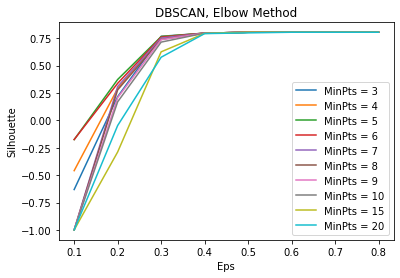

In [6]:
#Elbow Method. I plot Epsilon vs Silhouette and Min Pts.
silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = [3, 4, 5, 6, 7, 8, 9, 10,15,20]

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(X)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(X, db.labels_, metric='euclidean',random_state=29)
    

plt.figure();
#plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));
#plt.plot(epss, ss[:, 1]);
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();
#plt.savefig('out/simple_dbscan_elbow');

array([2, 2, 2, 2, 3, 1, 2, 3, 3, 3, 4, 5, 5, 5, 2, 4, 2, 3, 3, 4, 5, 4,
       2, 3, 4, 1, 1, 2, 3, 2, 2, 2, 3, 2, 5, 2, 3, 2, 5, 5, 2, 3, 1, 2,
       2, 1, 4, 1, 5, 2, 3, 5, 1, 3, 2, 3, 5, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       3, 1, 1, 2, 2, 5, 3, 3, 5, 2, 5, 2, 2, 1, 2, 4, 2, 3, 3, 5, 5, 2,
       2, 2, 2, 2, 1, 3, 2, 1, 5, 2, 2, 5, 5, 1, 5, 1, 5, 3, 3, 5, 5, 2,
       3, 5, 2, 5, 5, 5, 2, 5, 1, 3, 5, 3, 3, 3, 5, 4, 2, 3, 2, 2, 5, 2,
       5, 2, 1, 3, 4, 1, 2, 5, 3, 2, 2, 1, 2, 1, 2, 4, 2, 3, 2, 5, 3, 2,
       3, 4, 5, 2, 3, 2, 5, 3, 2, 5, 3, 5, 3, 2, 5, 2, 3, 2, 5, 2, 3, 2,
       2, 3, 3, 3, 2, 2, 5, 1, 1, 3, 5, 2, 2, 2, 5, 3, 2, 2, 2, 3, 1, 5,
       3, 3, 3, 5, 2, 5, 2, 5, 2, 3, 1, 2, 3, 3, 3, 3, 2, 3, 5, 1, 5, 3,
       2, 2, 5, 3, 5, 1, 5, 2, 2, 3, 2, 2, 3, 2, 2, 2, 5, 2, 5, 5, 1, 2,
       2, 2, 4, 2, 5, 3, 1, 1, 1, 3, 2, 5, 3, 3, 5, 5, 2, 2, 4, 2, 2, 3,
       2, 3, 5, 1, 2, 5, 3, 2, 3, 3, 5, 2, 3, 3, 2, 2, 3, 5, 5, 4, 5, 3,
       3, 5, 4, 3, 3, 1, 2, 5, 5, 2, 5, 3, 3, 5, 2,

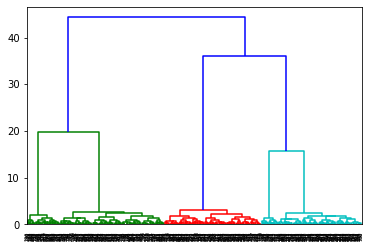

In [7]:
######################################## Hierarchical Clustering
### Once I realized that 5 clusters yield the best results, I decided to implement a hierarchical clustering
import scipy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
import sklearn.metrics as sm
from scipy import stats
agg=scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')
hierarchichal=scipy.cluster.hierarchy.dendrogram(agg)
labels = scipy.cluster.hierarchy.fcluster(agg,5,criterion='maxclust')
labels


In [8]:
### Once I ran a K-means, DBSCANS and HIerarchical, I decided to print the summary results for each cluster
## using the results from the hierarchical clustering
## The output of this input will provide the summary statistics for each of the clusters


from scipy import stats
import seaborn as sns
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
df.describe(include=[np.number]).transpose()

for i, label in enumerate(set(labels)):
    n = df.iloc[labels==label].shape[0]
      
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(n))

    df.iloc[labels==label].describe(include=[np.number]).transpose()


All Data:
Number of Instances: 505


,count,mean,std,min,25%,50%,75%,max
Age,505.00,59.02,24.14,17.00,34.00,59.00,85.00,97.00
Income,505.00,75513.29,35992.92,12000.00,34529.00,75078.00,107100.00,142000.00
SpendingScore,505.00,0.51,0.26,0.00,0.30,0.37,0.77,1.00
Savings,505.00,11862.46,4949.23,0.00,6828.71,14209.93,16047.27,20000.00



Cluster 1:
Number of Instances: 50


,count,mean,std,min,25%,50%,75%,max
Age,50.00,24.18,3.66,17.00,22.00,24.50,27.00,31.00
Income,50.00,128029.12,5688.90,117108.00,123042.00,128162.00,131435.75,142000.00
SpendingScore,50.00,0.90,0.04,0.81,0.87,0.89,0.93,1.00
Savings,50.00,4087.52,1277.75,0.00,3275.32,4361.97,4986.86,6089.48



Cluster 2:
Number of Instances: 157


,count,mean,std,min,25%,50%,75%,max
Age,157.00,59.96,3.38,51.00,58.00,59.00,62.00,68.00
Income,157.00,72448.06,6240.26,56321.00,68463.00,72027.00,76594.00,90422.00
SpendingScore,157.00,0.77,0.05,0.66,0.74,0.77,0.80,0.91
Savings,157.00,6889.97,1052.28,4077.66,6225.38,6845.06,7497.23,10547.78



Cluster 3:
Number of Instances: 147


,count,mean,std,min,25%,50%,75%,max
Age,147.00,87.78,3.51,79.00,85.00,88.00,91.00,97.00
Income,147.00,27866.10,6448.81,12000.00,23361.00,27771.00,32601.00,46977.00
SpendingScore,147.00,0.33,0.05,0.20,0.30,0.32,0.36,0.47
Savings,147.00,16659.26,1183.85,13470.97,15957.28,16711.07,17433.13,20000.00



Cluster 4:
Number of Instances: 25


,count,mean,std,min,25%,50%,75%,max
Age,25.00,86.00,3.66,77.00,84.00,86.00,88.00,93.00
Income,25.00,119944.04,4941.05,110582.00,117347.00,119429.00,123651.00,128596.00
SpendingScore,25.00,0.07,0.04,0.00,0.04,0.06,0.08,0.16
Savings,25.00,14808.68,1159.34,12554.69,14047.39,14773.41,15391.95,17833.09



Cluster 5:
Number of Instances: 126


,count,mean,std,min,25%,50%,75%,max
Age,126.00,32.78,3.79,22.00,30.00,33.00,35.00,44.00
Income,126.00,105265.81,6080.62,89598.00,100760.25,106002.50,108858.75,119877.00
SpendingScore,126.00,0.31,0.05,0.17,0.28,0.31,0.34,0.41
Savings,126.00,14962.78,1061.73,12207.53,14223.79,14976.94,15682.29,17968.55
